In [19]:
import pandas as pd
import numpy as np

print(pd.Series([1,2,3]))

0    1
1    2
2    3
dtype: int64


In [4]:

a_array=np.array([
    [1,2],
    [3,4]
])

a_df=pd.DataFrame(
    {'a':[1,3],
     'b':[2,4]}
)
print("numpy array:\n",a_array)
print('\npandas df:\n',a_df)

numpy array:
 [[1 2]
 [3 4]]

pandas df:
    a  b
0  1  2
1  3  4


# 1 Basic Operation
## 1.1 File Operation

Pandas can read data from Excel, txt, csv and even website

In [14]:
# read data from xsls
df=pd.read_excel('physical_examing_data.xlsx',index_col=0) # index_col use column as index
# df=pd.read_excel('physical_examing_data.xlsx')
df

# store xlsx data
df.loc[2,'体重']=1
print(df)
df.to_excel('modified_examing_data.xlsx')

pd=pd.read_excel('modified_examing_data.xlsx')
pd

    姓名   身高  体重   肺活量
学号                   
1   小明  168  60  3200
2   小黄  187   1  3800
3   小花  170  70  3400


,学号,姓名,身高,体重,肺活量
0,1,小明,168,60,3200
1,2,小黄,187,1,3800
2,3,小花,170,70,3400


In [23]:
# use Python to read data
with open('physical.csv','r',encoding='utf-8') as f:
    print(f.read())

# use pandas to read csv
# read csv can be also used to read txt file
df_csv=pd.read_csv('physical.csv',index_col=0)
df_csv

# store data to csv/txt
df_csv.to_csv('physical.txt')

# read from txt
df_txt=pd.read_csv('physical.txt')
df_txt

学号,姓名,身高,体重,肺活量
1,小明,168,60,3200
2,小黄,187,80,3800
3,小花,170,70,3400



,学号,姓名,身高,体重,肺活量
0,1,小明,168,60,3200
1,2,小黄,187,80,3800
2,3,小花,170,70,3400


## 2.1 Data in Pandas

1. Series
2. DataFrame

In [27]:
# data series

import pandas as pd

l=[11,22,33]
s=pd.Series(l)
print('list: ',l)
print('series:\n',s)

list:  [11, 22, 33]
series:
 0    11
1    22
2    33
dtype: int64


In [32]:
# pandas craete index for us, and we can mannully set the index
s=pd.Series(l,index=['a','b','c']) # use list to create series
print(s)

s=pd.Series({'a':1,'b,':2,'c':3})  # use dict to create series
print(s)

s=pd.Series(np.random.rand(3),index=['a','b','c']) # use numpy to create series
print(s)
# from pandas to numpy
print('array: ',s.to_numpy())
# from pandas to list
print('list: ',s.tolist())

a    11
b    22
c    33
dtype: int64
a     1
b,    2
c     3
dtype: int64
a    0.959669
b    0.015147
c    0.659734
dtype: float64
array:  [0.95966885 0.0151474  0.65973353]
list:  [0.9596688547063419, 0.015147401498772917, 0.6597335257614889]


In [33]:
# data frame
df=pd.DataFrame([
    [1,2],
    [3,4]
])

print(df)

   0  1
0  1  2
1  3  4


In [35]:
# access data
print(df.at[0,1])

# set index while creating DataFrame
df=pd.DataFrame({'col1':[1,3],'col2':[2,4]})
print(df)

2
   col1  col2
0     1     2
1     3     4


In [38]:
# get Series from DataFrame
print(df['col1'],'\n')
print('data type: ',type(df['col1']))

s=pd.Series([1.0,2.0,3.0],index=['a','b','c'])
df=pd.DataFrame({'col1':[1,3],'col2':[2,4]},index=['a','b'])
print(s,'\n')
print(df)

0    1
1    3
Name: col1, dtype: int64 

data type:  <class 'pandas.core.series.Series'>
a    1.0
b    2.0
c    3.0
dtype: float64 

   col1  col2
a     1     2
b     3     4


In [39]:
print(df.index,'\n') # index is row
print(df.columns)

Index(['a', 'b'], dtype='object') 

Index(['col1', 'col2'], dtype='object')


In [40]:
# create from json
my_json_data=[
    {'age':12,'height':111},
    {'age':13, 'height':123}
]

df=pd.DataFrame(my_json_data,index=['Jack','Rose'])
print(df)

      age  height
Jack   12     111
Rose   13     123


## 1.3 select data from pandas


In [2]:
import numpy as np
import pandas as pd

data=np.arange(-12,12).reshape((6,4))
df=pd.DataFrame(
    data,
    index=list('abcdef'),
    columns=list('ABCD')
)

df

,A,B,C,D
a,-12,-11,-10,-9
b,-8,-7,-6,-5
c,-4,-3,-2,-1
d,0,1,2,3
e,4,5,6,7
f,8,9,10,11


In [12]:
# select colume
print(df['B'])

# select like Excel: loc
print(data[2:3,1:3])
print(df.loc['c':'d','B':'D']) # it will include 'd', and 'D', while numpy will not

# select like numpy: iloc
print('numpy data:\n',data[2:3,1:3])
print('\npandas data:\n',df.iloc[2:3,1:3]) # usd number instead of index or column

a   -11
b    -7
c    -3
d     1
e     5
f     9
Name: B, dtype: int64
[[-3 -2]]
   B  C  D
c -3 -2 -1
d  1  2  3
numpy data:
 [[-3 -2]]

pandas data:
    B  C
c -3 -2


In [14]:
row_lables=df.index[2:4] # get index
print(row_lables)

print('\ndf:\n',df.loc[row_lables,['A','C']])

Index(['c', 'd'], dtype='object')

df:
    A  C
c -4 -2
d  0  2


In [16]:
df[df['A']<0] # select all rows whose A < 0

,A,B,C,D
a,-12,-11,-10,-9
b,-8,-7,-6,-5
c,-4,-3,-2,-1


In [21]:
print(df)
print(df.iloc[0])

print('\n')
print(df.loc[:,df.iloc[0]<-10]) # first row data < -10

    A   B   C   D
a -12 -11 -10  -9
b  -8  -7  -6  -5
c  -4  -3  -2  -1
d   0   1   2   3
e   4   5   6   7
f   8   9  10  11
A   -12
B   -11
C   -10
D    -9
Name: a, dtype: int64


    A   B
a -12 -11
b  -8  -7
c  -4  -3
d   0   1
e   4   5
f   8   9


In [24]:
list_data=list(range(-4,4))
print(list_data)

s=pd.Series(
    list_data,
    index=list('abcdefgh')
)

print(s)

print(s.loc[['a','b','c']]) # location
print(s.iloc[[1,2,3]])  # index location

[-4, -3, -2, -1, 0, 1, 2, 3]
a   -4
b   -3
c   -2
d   -1
e    0
f    1
g    2
h    3
dtype: int64
a   -4
b   -3
c   -2
dtype: int64
b   -3
c   -2
d   -1
dtype: int64


# 2 Statistical display
## 2.1 Basic statistical methods
1. mean, median
2. sum,prod
3. max,min
4. innull,notnull,dropna,fillna
5. idxmin,idxmax

In [26]:
# quick show DataFrame info
print(df)
df.describe()

    A   B   C   D
a -12 -11 -10  -9
b  -8  -7  -6  -5
c  -4  -3  -2  -1
d   0   1   2   3
e   4   5   6   7
f   8   9  10  11


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-2.000000,-1.000000,0.000000,1.000000
std,7.483315,7.483315,7.483315,7.483315
min,-12.000000,-11.000000,-10.000000,-9.000000
25%,-7.000000,-6.000000,-5.000000,-4.000000
50%,-2.000000,-1.000000,0.000000,1.000000
75%,3.000000,4.000000,5.000000,6.000000
max,8.000000,9.000000,10.000000,11.000000


In [30]:
print(df.mean()) # calculate mean of each column
print(df.mean(axis=1)) # calculate mean of each row

s=pd.Series([1000,2000,4000,100000])
print(s.median()) # median

A   -2.0
B   -1.0
C    0.0
D    1.0
dtype: float64
a   -10.5
b    -6.5
c    -2.5
d     1.5
e     5.5
f     9.5
dtype: float64
3000.0


In [36]:
df=pd.DataFrame(np.arange(12).reshape((4,3)),columns=['c0','c1','c2'])
print(df)

print('sum:\n',df.sum()) # calculate sum of each column
print('sum:\n',df.sum(axis=1)) # calculate sum of each row

print('prod:\n',df.prod())
print('prod:\n',df.prod(axis=1))



   c0  c1  c2
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11
sum:
 c0    18
c1    22
c2    26
dtype: int64
sum:
 0     3
1    12
2    21
3    30
dtype: int64
prod:
 c0      0
c1    280
c2    880
dtype: int64
prod:
 0      0
1     60
2    336
3    990
dtype: int64


In [38]:
# max
print('max:\n',df.max())
print('max:\n',df.max(axis=1))

# min
print('min:\n',df.min())
print('min:\n',df.min(axis=1))

max:
 c0     9
c1    10
c2    11
dtype: int64
max:
 0     2
1     5
2     8
3    11
dtype: int64
min:
 c0    0
c1    1
c2    2
dtype: int64
min:
 0    0
1    3
2    6
3    9
dtype: int64


In [39]:
# deal with None
df = pd.DataFrame(
    [[1, 2, 3, 0],
    [3, 4, None, 1],
    [None, None, None, None],
    [None, 3, None, 4]],
    columns=list("ABCD")
)

print(df)

print('\nisnull:\n',df.isnull()) # Trus means None
print('\nisnull:\n',df.isnull()) # Trus means not None

     A    B    C    D
0  1.0  2.0  3.0  0.0
1  3.0  4.0  NaN  1.0
2  NaN  NaN  NaN  NaN
3  NaN  3.0  NaN  4.0

isnull:
        A      B      C      D
0  False  False  False  False
1  False  False   True  False
2   True   True   True   True
3   True  False   True  False

isnull:
        A      B      C      D
0  False  False  False  False
1  False  False   True  False
2   True   True   True   True
3   True  False   True  False


In [43]:
# drop none
print('\ndropna:\n',df.dropna(axis=0))
print('\n',df)

print('\n',df.dropna(axis=1))


dropna:
      A    B    C    D
0  1.0  2.0  3.0  0.0

      A    B    C    D
0  1.0  2.0  3.0  0.0
1  3.0  4.0  NaN  1.0
2  NaN  NaN  NaN  NaN
3  NaN  3.0  NaN  4.0

 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [47]:
# index
print('max_index:\n %s\n' % df.idxmax())
print('max_index:\n %s\n' % df.idxmax(axis=1))
print('min_index:\n %s\n' % df.idxmin())

max_index:
 A    1
B    1
C    0
D    3
dtype: int64

max_index:
 0      C
1      B
2    NaN
3      D
dtype: object

min_index:
 A    0
B    0
C    0
D    0
dtype: int64



## 2.2 Draw a chart
1. scatter
2. plot
3. var
4. histogram
5. pie
6. area

             x         y
0     1.670942 -0.007290
1     0.289705 -0.489436
2     1.610777  0.723342
3    -2.000761 -1.292875
4     0.183494 -0.749531
...        ...       ...
1019 -1.642002 -0.274045
1020  1.832120  0.416557
1021  0.147389 -0.053902
1022 -1.145520  0.604756
1023  1.147145  1.449796

[1024 rows x 2 columns]


<AxesSubplot:xlabel='x', ylabel='y'>

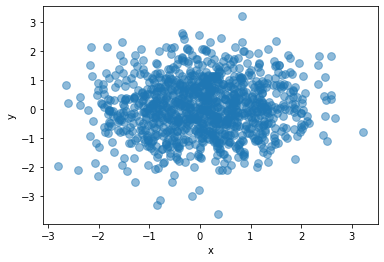

In [51]:
# scatter plot

n=1024
df=pd.DataFrame({
    'x':np.random.normal(0,1,n),
    'y':np.random.normal(0,1,n)
})

print(df)
color=np.arctan2(df['y'],df['x'])

# c: color
# s: size for each dot
# alpha: opacity
# cmap: color map
df.plot.scatter(x='x',y='y',c=color,s=60,alpha=0.5,cmap='rainbow')


<AxesSubplot:xlabel='x'>

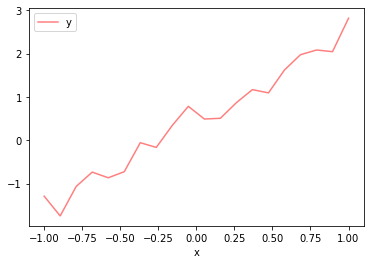

In [54]:
## line chart: plot
n=20
x=np.linspace(-1,1,n)

y=x*2+0.4+np.random.normal(0,0.3,n)

df=pd.DataFrame({
    'x':x,
    'y':y
})

df.plot(x='x',y='y',alpha=0.5,c='r')

<AxesSubplot:xlabel='x'>

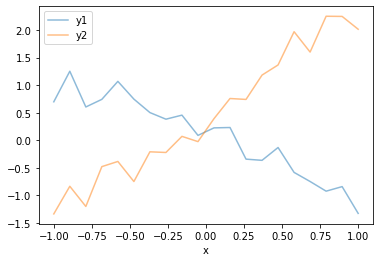

In [55]:
n = 20    # data size
x = np.linspace(-1, 1, n)
y1 = x * -1 - 0.1 + np.random.normal(0, 0.3, n)
y2 = x * 2 + 0.4 + np.random.normal(0, 0.3, n)
df = pd.DataFrame({
    "x": x,
    "y1": y1,
    "y2": y2, 
})
df.plot(x="x", y=["y1", "y2"], alpha=.5) # draw two lines


<AxesSubplot:>

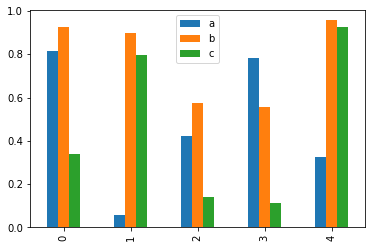

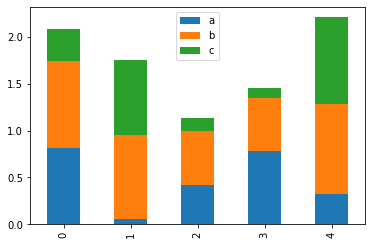

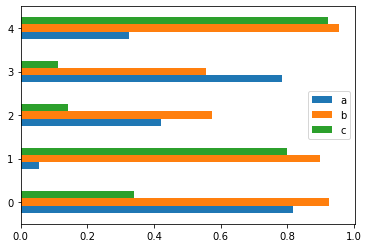

In [58]:
## bar diagram
df=pd.DataFrame(np.random.rand(5,3),columns=['a','b','c'])

df.plot.bar()

df.plot.bar(stacked=True)

df.plot.barh() # horizontal

<AxesSubplot:ylabel='Frequency'>

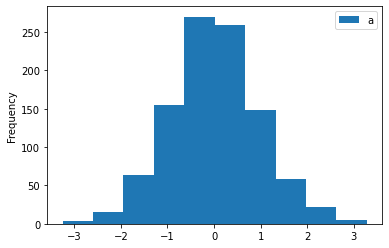

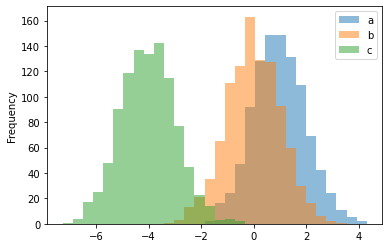

In [62]:
## distribution graph: histogram

df=pd.DataFrame({'a':np.random.randn(1000)})

df.plot.hist()

df = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 4,
    }
)

df.plot.hist(alpha=0.5, bins=30) # bins define the number of cylinders

<AxesSubplot:ylabel='boss'>

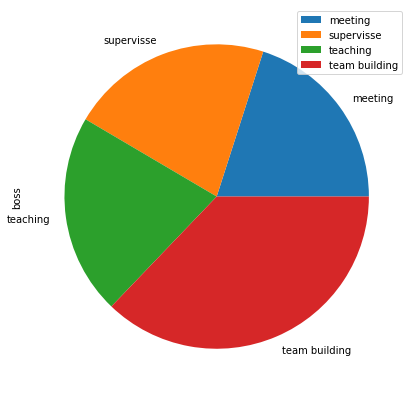

In [65]:
## Pie graph

df=pd.DataFrame({'boss':np.random.rand(4)},index=['meeting','supervisse','teaching','team building'])

df.plot.pie(y='boss',figsize=(7,7))

array([<AxesSubplot:ylabel='bigBoss'>, <AxesSubplot:ylabel='smallBoss'>],
      dtype=object)

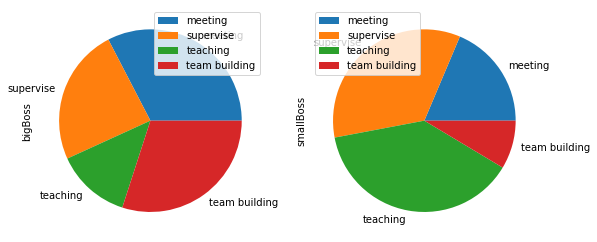

In [67]:
df = pd.DataFrame(
    {
        "bigBoss": np.random.rand(4),
        "smallBoss": np.random.rand(4),
    },
    index=["meeting", "supervise", "teaching", "team building"], 
)
df.plot.pie(subplots=True, figsize=(9,9), legend=True) # draw two pictures

<AxesSubplot:>

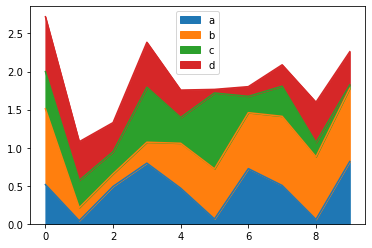

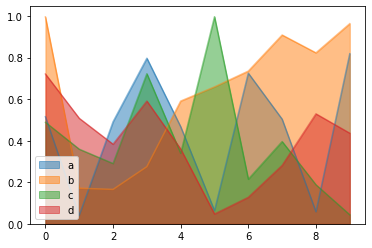

In [72]:
## Area graph

df=pd.DataFrame(
    np.random.rand(10,4),
    columns=['a','b','c','d']
)

df.plot.area()
df.plot.area(stacked=False)

# 3 Data Process
## 3.1 Calculation Methods

In [73]:
# filter and assignment operations
data=np.arange(-12,12).reshape((6,4))
df=pd.DataFrame(
    data,
    index=list('abcdef'),
    columns=list('ABCD')
)

print(df)

    A   B   C   D
a -12 -11 -10  -9
b  -8  -7  -6  -5
c  -4  -3  -2  -1
d   0   1   2   3
e   4   5   6   7
f   8   9  10  11


In [74]:
df['A']*=0
print(df)

   A   B   C   D
a  0 -11 -10  -9
b  0  -7  -6  -5
c  0  -3  -2  -1
d  0   1   2   3
e  0   5   6   7
f  0   9  10  11


In [77]:
df.loc['a','A']=100 # location
print(df)

df.iloc[1,0]=200    # index location
print(df)

df.loc['a',:]=df.loc['a',:]*2
print(df)

     A   B   C   D
a  100 -11 -10  -9
b  200  -7  -6  -5
c    0  -3  -2  -1
d    0   1   2   3
e    0   5   6   7
f    0   9  10  11
     A   B   C   D
a  100 -11 -10  -9
b  200  -7  -6  -5
c    0  -3  -2  -1
d    0   1   2   3
e    0   5   6   7
f    0   9  10  11
     A   B   C   D
a  200 -22 -20 -18
b  200  -7  -6  -5
c    0  -3  -2  -1
d    0   1   2   3
e    0   5   6   7
f    0   9  10  11


In [80]:
print(df["A"][df["A"] == 0])
print(df["A"])
print(df["A"] == 0)


c    0
d    0
e    0
f    0
Name: A, dtype: int64
a    200
b    200
c      0
d      0
e      0
f      0
Name: A, dtype: int64
a    False
b    False
c     True
d     True
e     True
f     True
Name: A, dtype: bool


In [84]:
## Apply method
df=pd.DataFrame([[4,9]]*3,columns=['A','B'])
print(df)

# sqrt
print(np.sqrt(df))

print(df.apply(np.sqrt))

   A  B
0  4  9
1  4  9
2  4  9
     A    B
0  2.0  3.0
1  2.0  3.0
2  2.0  3.0
     A    B
0  2.0  3.0
1  2.0  3.0
2  2.0  3.0


In [88]:
def func(x):
    return x[0]*2, x[1]*-1

df.apply(func,axis=1,result_type='expand')
print(df)

df.apply(func,axis=1,result_type='broadcast')
print(df)

   A  B
0  4  9
1  4  9
2  4  9
   A  B
0  4  9
1  4  9
2  4  9


## 3.2 Word Processing
1. upper, lower, len
2. strip, lstrip, rstrip
3. split
4. contains, match, startswitdh, endswidth
5. replace
6. extract, extarctall
7. cat


In [89]:
## format string

py_s = "A,B,C,Aaba,Baca,CABA,dog,cat"
pd_s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", "CABA", "dog", "cat"],
    dtype="string")

print('python: \n',py_s.upper())
print('\npands:\n',pd_s.str.upper())

python: 
 A,B,C,AABA,BACA,CABA,DOG,CAT

pands:
 0       A
1       B
2       C
3    AABA
4    BACA
5    CABA
6     DOG
7     CAT
dtype: string


In [91]:
pd_not_s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", "CABA", "dog", "cat"],
)

print('pd_not_s type: ',pd_not_s.dtype)
pd_s=pd_not_s.astype("string") # if we want to use pd.str function, we have to make dtype to string
print('pd_s type: ',pd_s.dtype)

pd_not_s type:  object
pd_s type:  string


In [92]:
print('python lower:\n',py_s.lower())
print('\npandas lower:\n',pd_s.str.lower())
print('\npython len:\n',[len(s) for s in py_s.split(',')])
print('\npandas len:\n',pd_s.str.len())

python lower:
 a,b,c,aaba,baca,caba,dog,cat

pandas lower:
 0       a
1       b
2       c
3    aaba
4    baca
5    caba
6     dog
7     cat
dtype: string

python len:
 [1, 1, 1, 4, 4, 4, 3, 3]

pandas len:
 0    1
1    1
2    1
3    4
4    4
5    4
6    3
7    3
dtype: Int64


In [95]:
py_s = ["   jack", "jill ", "    jesse    ", "frank"]
pd_s=pd.Series(py_s,dtype='string')


print('python strip:\n',[s.strip() for s in py_s])
print('\npandas strip:\n',pd_s.str.strip())

print('python lstrip:\n',[s.lstrip() for s in py_s])
print('\npandas lstrip:\n',pd_s.str.lstrip())

print('python rstrip:\n',[s.rstrip() for s in py_s])
print('\npandas rstrip:\n',pd_s.str.rstrip())

python strip:
 ['jack', 'jill', 'jesse', 'frank']

pandas strip:
 0     jack
1     jill
2    jesse
3    frank
dtype: string
python lstrip:
 ['jack', 'jill ', 'jesse    ', 'frank']

pandas lstrip:
 0         jack
1        jill 
2    jesse    
3        frank
dtype: string
python rstrip:
 ['   jack', 'jill', '    jesse', 'frank']

pandas rstrip:
 0         jack
1         jill
2        jesse
3        frank
dtype: string


In [101]:
py_s = ["a_b_c", "jill_jesse", "frank"]
pd_s = pd.Series(py_s, dtype="string")

print('python split:\n',[s.split('_') for s in py_s])
print('\npandas splite:\n',pd_s.str.split('_'))

print('\npandas splite:\n',pd_s.str.split('_',expand=True))

python split:
 [['a', 'b', 'c'], ['jill', 'jesse'], ['frank']]

pandas splite:
 0        [a, b, c]
1    [jill, jesse]
2          [frank]
dtype: object

pandas splite:
        0      1     2
0      a      b     c
1   jill  jesse  <NA>
2  frank   <NA>  <NA>


In [103]:
## Regular expresion
pattern = r"[0-9][a-z]"

s=pd.Series(['1','1a','11c','abc'],dtype='string')
c=s.str.contains(pattern)
print(c)

0    False
1     True
2     True
3    False
dtype: boolean


In [104]:
pattern=r'[\d]+?[a-z]'
print(s.str.match(pattern))

0    False
1     True
2     True
3    False
dtype: boolean


In [106]:
# startswith, endswith
py_s = ["1", "1a1", "21c", "abc"]
pd_s = pd.Series(py_s, dtype="string")

print('py_s startswith 1: \n',[s.startswith('1') for s in py_s])
print('\npy_s endswith 1: \n',[s.endswith('1') for s in py_s])

print('\npd_s startswith 1: \n',pd_s.str.startswith('1'))
print('\npd_s endswith 1: \n',pd_s.str.endswith('1'))

py_s startswith 1: 
 [True, True, False, False]

py_s endswith 1: 
 [True, True, False, False]

pd_s startswith 1: 
 0     True
1     True
2    False
3    False
dtype: boolean

pd_s endswith 1: 
 0     True
1     True
2    False
3    False
dtype: boolean


In [107]:
# replace
py_s = ["1", "1a", "21c", "abc"]
pd_s = pd.Series(py_s, dtype="string")

print('py_s replace 1->9: \n',[s.replace('1','9') for s in py_s])
print('\npd_s replace 1->9:\n', pd_s.str.replace('1','9'))

py_s replace 1->9: 
 ['9', '9a', '29c', 'abc']

pd_s replace 1->9:
 0      9
1     9a
2    29c
3    abc
dtype: string


In [108]:
## concatenate
s1 = pd.Series(["A", "B", "C", "D"], dtype="string")
s2 = pd.Series(["1", "2", "3", "4"], dtype="string")
s1.str.cat(s2)
print(s1)

0    A
1    B
2    C
3    D
dtype: string


## 3.3 Time data
1. to_datetime
2. date_range
3. Timedelta
4. dayofyear, dayofweek, weekofyear, weekday
5. strftime, day_name, month_name
6. localize, tz_convert
7. country_timezones

In [109]:
df = pd.DataFrame({
    "time": ["2022/03/12", "2022/03/13", "2022/03/14"],
    "value": [1,2,3]
})

print(df)

         time  value
0  2022/03/12      1
1  2022/03/13      2
2  2022/03/14      3


In [110]:
print(pd.to_datetime(df['time']))

0   2022-03-12
1   2022-03-13
2   2022-03-14
Name: time, dtype: datetime64[ns]


In [113]:
## self-created time sequence
import datetime

start=datetime.datetime(2022,3,13)
end=datetime.datetime(2022,3,18)

index=pd.date_range(start,end)
print(index)

print(pd.date_range(start,end,freq='48h'))


DatetimeIndex(['2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-03-13', '2022-03-15', '2022-03-17'], dtype='datetime64[ns]', freq='48H')


In [115]:
## choose time

start = datetime.datetime(2022, 3, 1)
end = datetime.datetime(2022, 5, 3)

rng=pd.date_range(start,end)
ts=pd.Series(np.random.randn(len(rng)),index=rng)

print(ts)
print(ts.index)

2022-03-01   -0.490580
2022-03-02   -1.900496
2022-03-03   -0.154626
2022-03-04    1.292559
2022-03-05    0.488174
                ...   
2022-04-29   -1.006626
2022-04-30   -0.698277
2022-05-01   -0.911698
2022-05-02    0.108159
2022-05-03   -0.155992
Freq: D, Length: 64, dtype: float64
DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',
 

<AxesSubplot:>

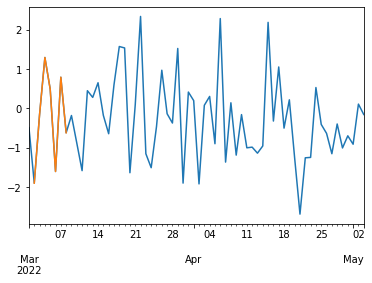

In [118]:
ts.plot()
ts[1:8].plot()

In [126]:
## time calculation

rng = pd.date_range("2022-01-01", "2022-01-07")
rng + pd.Timedelta(weeks=1) # add a week to each date
print(rng)


# day of year
rng=pd.date_range('2022-01-08','2022-01-12')
print(rng.dayofyear)


# format time
rng.strftime('%m/%d/%Y')

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07'],
              dtype='datetime64[ns]', freq='D')
Int64Index([8, 9, 10, 11, 12], dtype='int64')


Index(['01/08/2022', '01/09/2022', '01/10/2022', '01/11/2022', '01/12/2022'], dtype='object')

In [127]:
## timezone
rng = pd.date_range("2022-01-08", "2022-01-11")

rng.tz is None


True

In [128]:
s = pd.to_datetime(
    ["2022/03/12 22:11", "2022/03/12 12:11", "2022/03/12 2:11"]
)
s_us = s.tz_localize("America/New_York") # set timezone
s_us

DatetimeIndex(['2022-03-12 22:11:00-05:00', '2022-03-12 12:11:00-05:00',
               '2022-03-12 02:11:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

# 4 Data management
## 4.1 Data concat and merge
1. Concat
2. append
3. merge
4. join

In [129]:
df1 = pd.DataFrame({
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
}, index=[0, 1, 2, 3],)


df2 = pd.DataFrame({
    "A": ["A4", "A5", "A6", "A7"],
    "B": ["B4", "B5", "B6", "B7"],
    "C": ["C4", "C5", "C6", "C7"],
    "D": ["D4", "D5", "D6", "D7"],
}, index=[4, 5, 6, 7],)


df3 = pd.DataFrame({
    "A": ["A8", "A9", "A10", "A11"],
    "B": ["B8", "B9", "B10", "B11"],
    "C": ["C8", "C9", "C10", "C11"],
    "D": ["D8", "D9", "D10", "D11"],
}, index=[8, 9, 10, 11],)

In [130]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [131]:
all_classed=pd.concat(
    [df1,df2,df3],
    keys=['x','y','z']
)

all_classed

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [132]:
print(all_classed.loc['y'])

    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7


In [138]:
# concat by row
df4 = pd.DataFrame({
    "B": ["B2", "B3", "B6", "B7"],
    "D": ["D2", "D3", "D6", "D7"],
    "F": ["F2", "F3", "F6", "F7"],
}, index=[2, 3, 6, 7],)

print(df1,'\n',df4)

pd.concat([df1,df4],axis=1) # outer join

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3 
     B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [139]:
pd.concat([df1,df4],axis=1,join='inner') # inner join

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [140]:
pd.concat([df1,df4],ignore_index=True,sort=False)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [143]:
new_col = pd.Series(
    ["X0", "X1", "X2", "X3"],index=['A','B','C','D'])

print(new_col)

df1.append(new_col,ignore_index=True)

A    X0
B    X1
C    X2
D    X3
dtype: object


/tmp/ipykernel_948/23868259.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(new_col,ignore_index=True)


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


In [145]:
## Merge can only concat left part with rigth part
left = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
})


right = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
})

print(left)
print(right)

print(pd.merge(left,right))

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [151]:
left = pd.DataFrame({
    "key1": ["K0", "K0", "K1", "K2"],
    "key2": ["K0", "K1", "K0", "K1"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
})


right = pd.DataFrame({
    "key1": ["K0", "K1", "K1", "K2"],
    "key2": ["K0", "K0", "K0", "K0"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
})
print(left)
print(right)
# pd.merge(left,right,on=['key1','key2'])
pd.merge(left,right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [153]:
pd.merge(left,right,how='left',on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
